In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

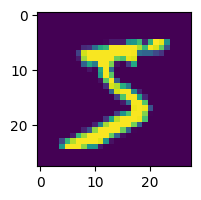

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [ ]:
y_train[2]

4

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [ ]:
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [ ]:
X_train[0]
#show data --gives array representation

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#2D to 1D
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(X_train_flattened,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8224 - loss: 0.7033
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9142 - loss: 0.3073
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9212 - loss: 0.2840
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9219 - loss: 0.2762
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9265 - loss: 0.2649


In [ ]:
y_pred=model.predict(X_test_flattened)
y_pred[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([4.6890867e-01, 4.2529567e-03, 9.9940413e-01, 2.9520035e-01,
       7.8527668e-10, 8.4589183e-01, 9.0792221e-01, 7.5178736e-13,
       1.6782387e-01, 4.0988430e-09], dtype=float32)

In [ ]:
np.argmax(y_pred[1])

2

In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    6,    5,    2,    2,    0],
       [   0, 1107,    3,    2,    1,    1,    4,    2,   15,    0],
       [   8,    9,  913,   15,   11,    5,   13,   13,   40,    5],
       [   4,    0,   17,  910,    0,   32,    3,   12,   22,   10],
       [   2,    1,    3,    1,  912,    0,   10,    4,    9,   40],
       [   9,    1,    2,   23,   10,  789,   17,    7,   27,    7],
       [  12,    3,    4,    1,    8,   15,  912,    2,    1,    0],
       [   1,    5,   23,    4,    6,    0,    0,  948,    2,   39],
       [   7,    7,    6,   19,    9,   29,   10,   11,  868,    8],
       [  11,    7,    1,   10,   22,    7,    0,   20,    5,  926]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'Truth')

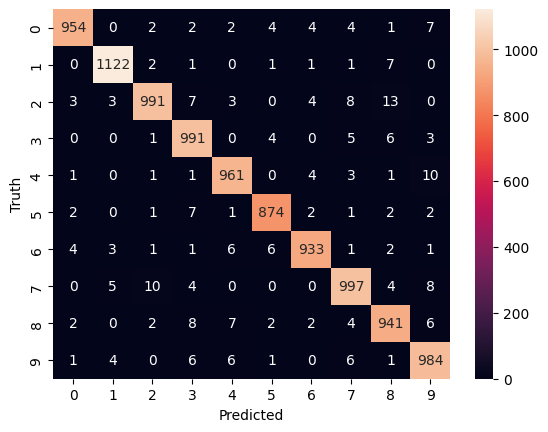

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    #hidden layer
    keras.layers.Dense(10,activation="sigmoid")])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(X_train_flattened,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8705 - loss: 0.4571
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9625 - loss: 0.1290
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9741 - loss: 0.0860
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9805 - loss: 0.0635
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9841 - loss: 0.0493


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9715 - loss: 0.0958


[0.08267784118652344, 0.9747999906539917]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

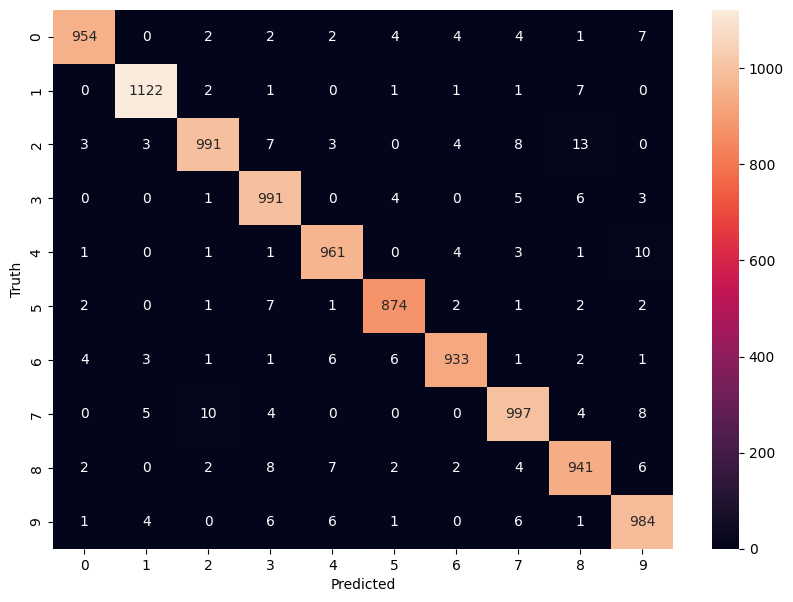

In [ ]:
y_pred=model.predict(X_test_flattened)
y_pred_labels=[np.argmax(i) for i in y_pred]

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

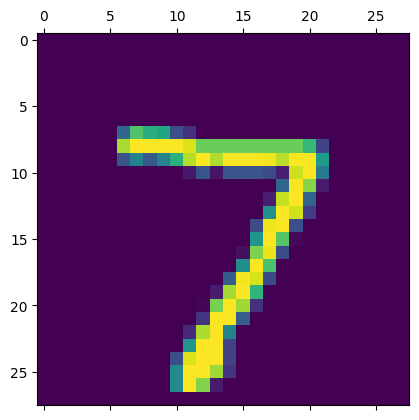

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_pred=model.predict(X_test_flattened)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([8.2205720e-03, 2.9228446e-05, 6.6260792e-02, 9.4121307e-01,
       9.9755795e-08, 4.4113800e-02, 5.6423128e-06, 9.9977046e-01,
       3.5634670e-02, 6.7950690e-01], dtype=float32)

In [ ]:
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

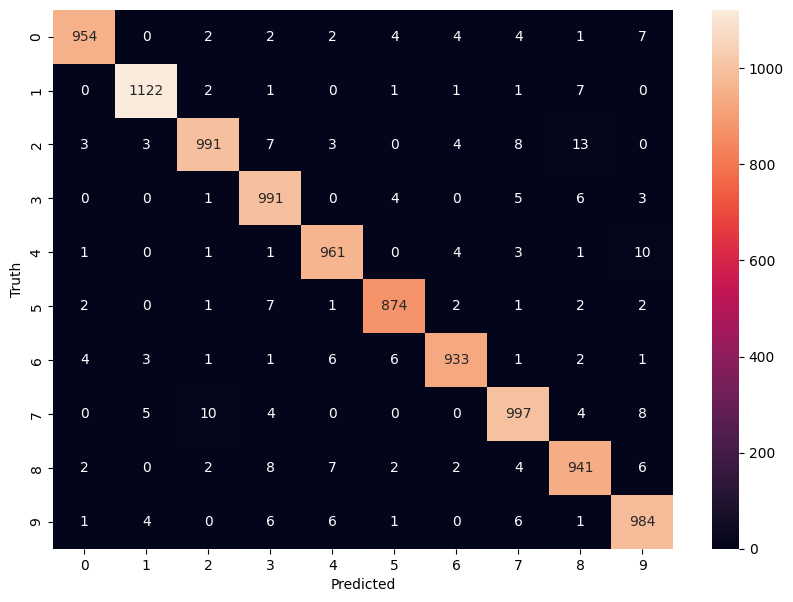

In [ ]:
y_pred=model.predict(X_test_flattened)
y_pred_labels=[np.argmax(i) for i in y_pred]

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")